# Gradient Descent for Linear Regression

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [43]:
data = fetch_california_housing()
x = data.data
y = data.target

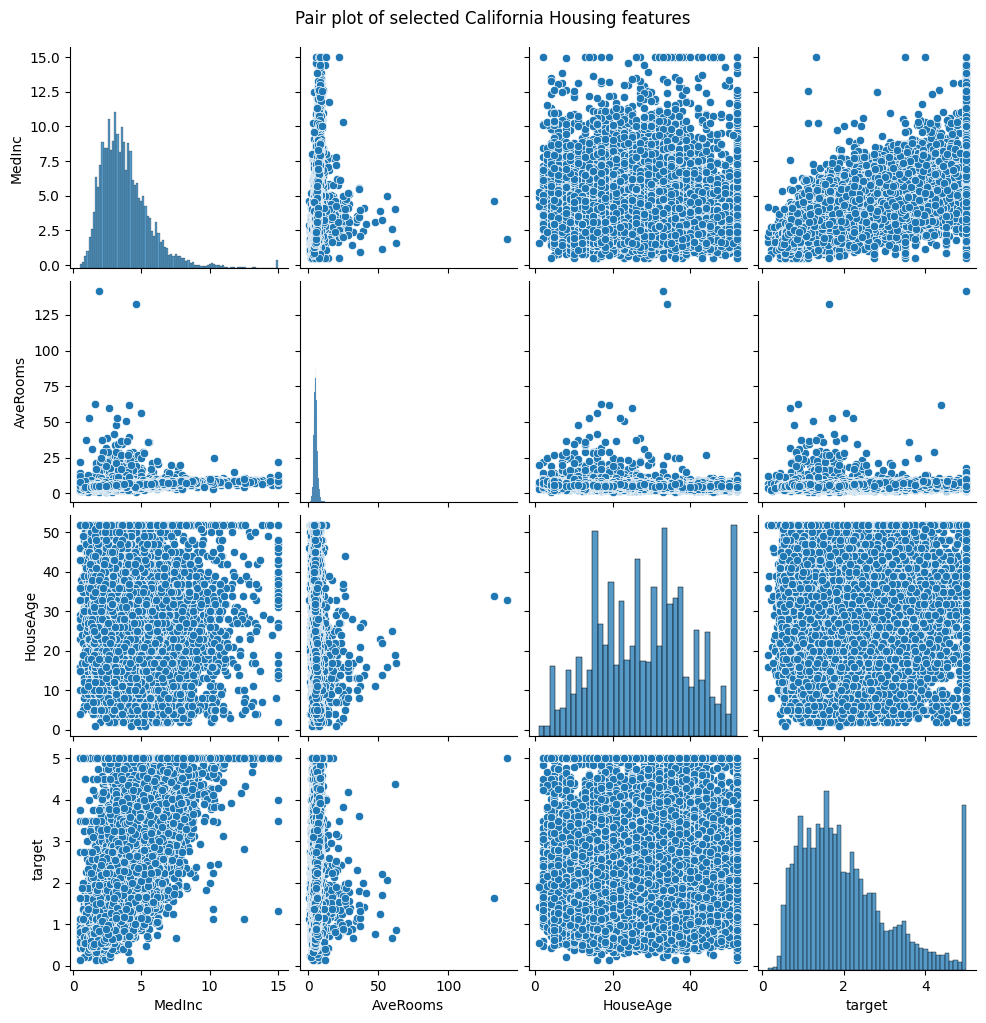

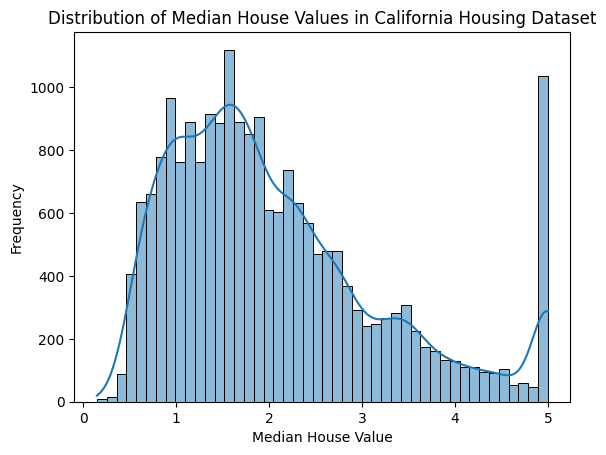

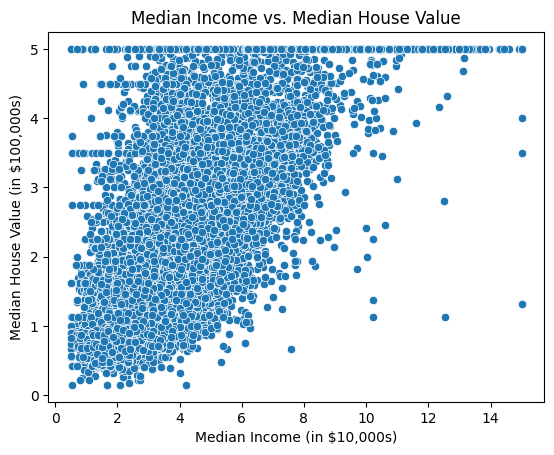

In [49]:
# Creating a DataFrame
df_housing = pd.DataFrame(x, columns=data.feature_names)
df_housing['target'] = y

features_to_plot = ['MedInc', 'AveRooms', 'HouseAge', 'target']
sns.pairplot(df_housing[features_to_plot])
plt.suptitle('Pair plot of selected California Housing features', y=1.02)
plt.show()

sns.histplot(df_housing['target'], kde=True)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Values in California Housing Dataset')
plt.show()

#Plotting Median Income vs. Target.
ax = sns.scatterplot(x='MedInc', y='target', data=df_housing)
ax.set(xlabel='Median Income (in $10,000s)', ylabel='Median House Value (in $100,000s)', title='Median Income vs. Median House Value');
plt.show()

In [50]:
import numpy as np
# Prepare data for Gradient Descent
X = df_housing[['MedInc']].values
m = X.shape[0]
X = np.hstack((np.ones((m, 1)), X))
y = df_housing['target'].values.reshape(-1, 1)

# Initialize parameters
theta = np.zeros(shape=(X.shape[1], 1))
iterations = 1500
alpha = 0.01


In [56]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [57]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[0.42955801]
 [0.42241746]]


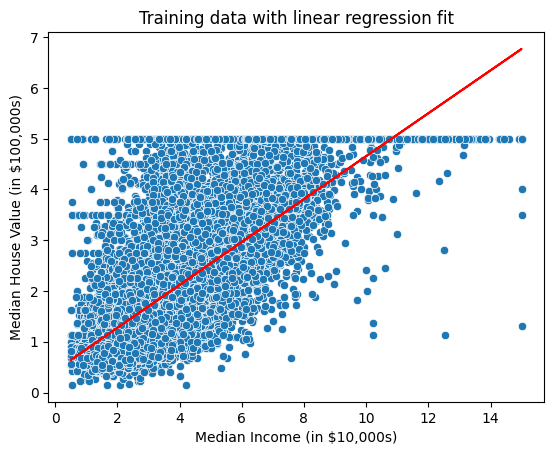

In [59]:
# Plot the linear fit
ax = sns.scatterplot(x='MedInc', y='target', data=df_housing)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Median Income (in $10,000s)', ylabel='Median House Value (in $100,000s)', title='Training data with linear regression fit');
plt.show()

In [60]:
# Make predictions using the trained theta
med_inc_to_predict = 4
X_predict = np.array([1, med_inc_to_predict]).dot(theta)

print(f'For a median income of ${med_inc_to_predict*10000:.2f}, we predict a median house value of ${X_predict[0]*100000:.2f}')

med_inc_to_predict_2 = 6
X_predict_2 = np.array([1, med_inc_to_predict_2]).dot(theta)
print(f'For a median income of ${med_inc_to_predict_2*10000:.2f}, we predict a median house value of ${X_predict_2[0]*100000:.2f}')

For a median income of $40000.00, we predict a median house value of $211922.79
For a median income of $60000.00, we predict a median house value of $296406.28


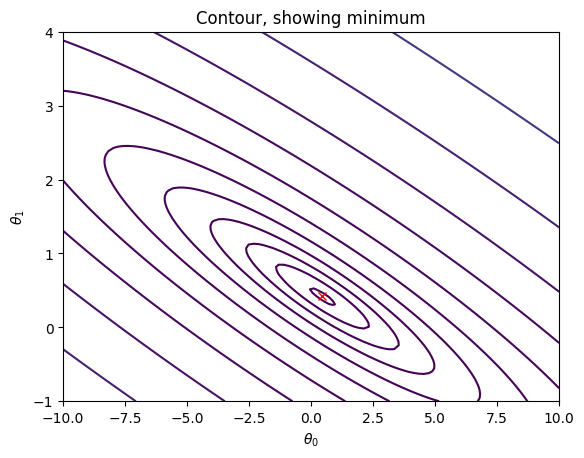

In [61]:
#Cost function
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = compute_cost(X, y, t)

ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');
plt.show()